<a href="https://colab.research.google.com/github/quantasaurus/normalization_and_correlation/blob/main/asset_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance -q

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Given a list of assets download their history from yahoo finance with a defined start and end date

assets = ['OCTO-USD'
        , 'ALGO-USD'
        , 'BTC-USD'
        , 'OPUL-USD'
        , 'COSG-USD'
        , 'HDL-USD']

start_date = "2022-10-16"
end_date = "2023-01-05"

df = yf.download(assets, start=start_date, end=end_date, interval='1h')['Close']


[*********************100%***********************]  6 of 6 completed


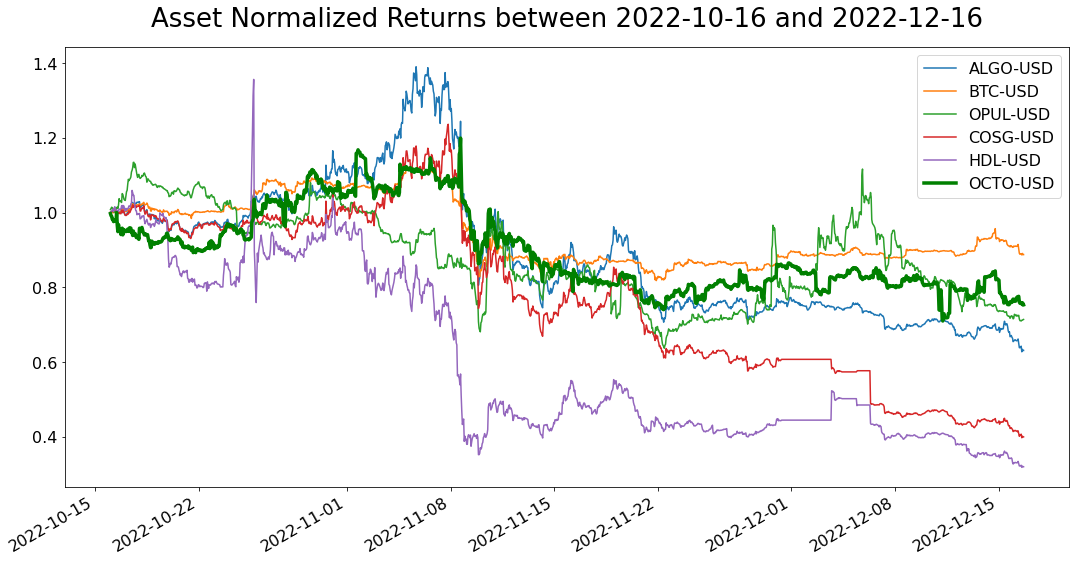

In [10]:
# Plots normalized returns between the first asset in our list and the others
not_octo = assets[1:]
np.log(df[not_octo] / df[not_octo].shift(1)).cumsum().apply(np.exp).plot(figsize=(18,9))#, style='--')
np.log(df[assets[0]] / df[assets[0]].shift(1)).cumsum().apply(np.exp).plot(linewidth=3.5, color='green', legend=True)
plt.title(f"Asset Normalized Returns between {df.index[0].date()} and {df.index[-1].date()}", fontsize =26, pad=20)
plt.show()

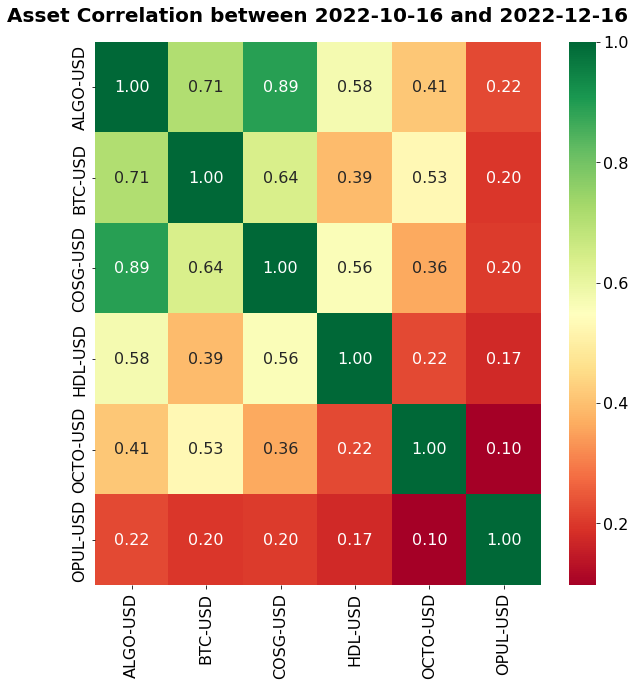

In [5]:
# Setup the plotting
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(10, 10))
plt.title(f"Asset Correlation between {df.index[0].date()} and {df.index[-1].date()}", fontsize=20, pad=20, weight='bold')

# Run correlation on returns for all assets
sns.heatmap(np.log(df / df.shift(1)).corr(), cmap='RdYlGn', ax=ax, annot=True, fmt='.2f')
plt.show()